In [1]:
import pm4py
import pandas

1) Case-centric PM

In [258]:
log = pm4py.read_xes('logs/event-log.xes')
df = pm4py.convert_to_dataframe(log)
log

parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

,case:REG_DATE,org:resource,concept:name,lifecycle:transition,case:AMOUNT_REQ,time:timestamp,case:concept:name
0,2011-10-01 02:38:00+00:00,112,submitted,COMPLETE,20000,2011-10-01 02:38:00+00:00,173688
1,2011-10-01 02:38:00+00:00,112,pre-accepted,COMPLETE,20000,2011-10-01 02:39:00+00:00,173688
2,2011-10-01 02:38:00+00:00,10862,accepted,COMPLETE,20000,2011-10-01 13:42:00+00:00,173688
3,2011-10-01 02:38:00+00:00,10862,finalized,COMPLETE,20000,2011-10-01 13:45:00+00:00,173688
4,2011-10-01 02:38:00+00:00,10629,registered,COMPLETE,20000,2011-10-13 12:37:00+00:00,173688
...,...,...,...,...,...,...,...
47757,2012-03-01 00:43:00+00:00,11169,pre-accepted,COMPLETE,8500,2012-03-01 10:27:00+00:00,214373
47758,2012-03-01 00:43:00+00:00,10933,accepted,COMPLETE,8500,2012-03-01 21:17:00+00:00,214373
47759,2012-03-01 00:43:00+00:00,10933,finalized,COMPLETE,8500,2012-03-01 21:22:00+00:00,214373
47760,2012-03-01 00:51:00+00:00,112,submitted,COMPLETE,15000,2012-03-01 00:51:00+00:00,214376


1a) DFGs

In [260]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
#pm4py.view_dfg(dfg, start_activities, end_activities)
print(start_activities)
print(dfg)
print(end_activities)

{'submitted': 13087}
{('accepted', 'cancelled'): 66, ('accepted', 'declined'): 29, ('accepted', 'finalized'): 5015, ('activated', 'approved'): 505, ('activated', 'registered'): 619, ('approved', 'activated'): 997, ('approved', 'registered'): 912, ('finalized', 'activated'): 476, ('finalized', 'approved'): 1055, ('finalized', 'cancelled'): 1640, ('finalized', 'declined'): 802, ('finalized', 'registered'): 715, ('pre-accepted', 'accepted'): 5113, ('pre-accepted', 'cancelled'): 1100, ('pre-accepted', 'declined'): 1085, ('registered', 'activated'): 773, ('registered', 'approved'): 686, ('submitted', 'cancelled'): 1, ('submitted', 'declined'): 5719, ('submitted', 'pre-accepted'): 7367}
{'activated': 1122, 'declined': 7635, 'cancelled': 2807, 'approved': 337, 'registered': 787, 'finalized': 327, 'pre-accepted': 69, 'accepted': 3}


In [ ]:
filtered_dfg, filtered_start, filtered_end = pm4py.filter_dfg_activities_percentage(
    dfg, start_activities, end_activities, percentage=0.2
)
pm4py.view_dfg(filtered_dfg, filtered_start, filtered_end)

In [ ]:
filtered_dfg, filtered_start, filtered_end = pm4py.filter_dfg_paths_percentage(
    dfg, start_activities, end_activities, percentage=0.2
)
pm4py.view_dfg(filtered_dfg, filtered_start, filtered_end)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log)
pm4py.view_performance_dfg(dfg, start_activities, end_activities)

1b) Petri nets

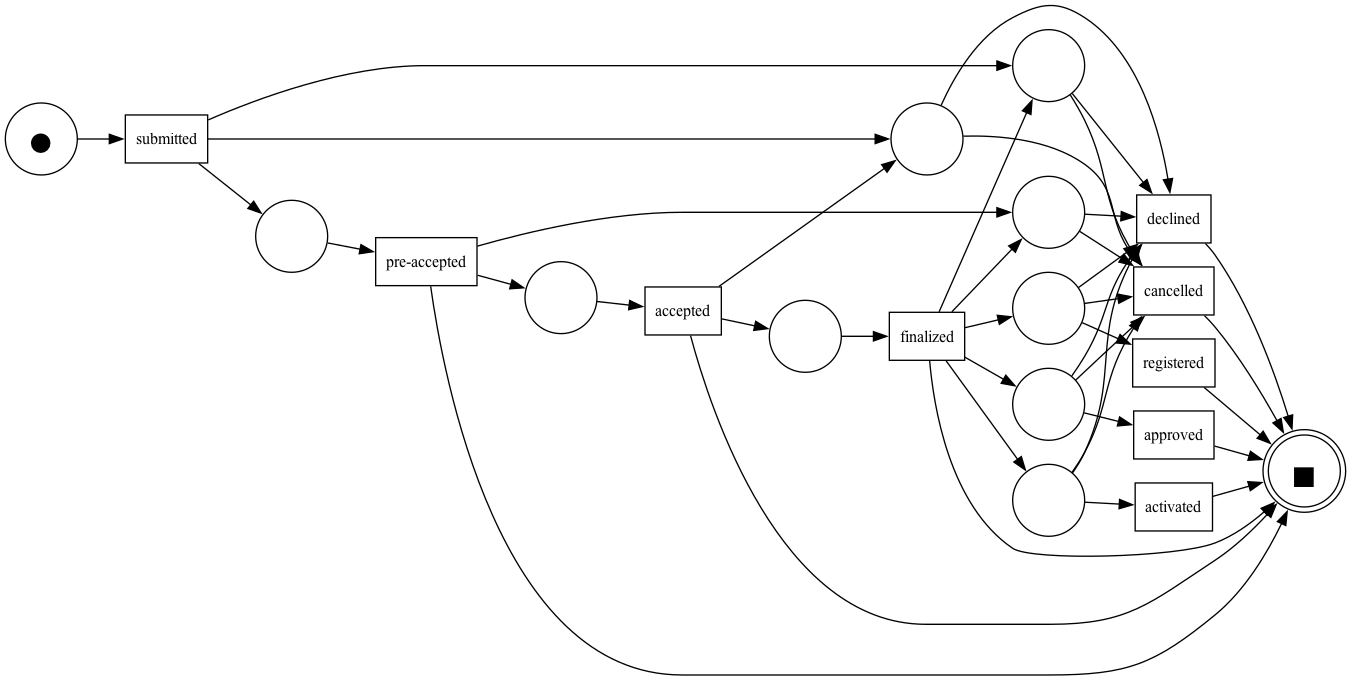

In [242]:
net, im, fm = pm4py.discover_petri_net_alpha(log)
pm4py.view_petri_net(net, im, fm)

In [222]:
net, im, fm = pm4py.discover_petri_net_ilp(log, alpha=0.5)
#pm4py.view_petri_net(net, im, fm)

discovering Petri net using ILP miner, completed causal relations ::   0%|          | 0/23 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.12/site-packages/pm4py/objects/petri_net/utils/murata.py:140: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn(


In [ ]:
net, im, fm = pm4py.discover_petri_net_heuristics(log, dependency_threshold=0.9, and_threshold=0.9, loop_two_threshold=0.9)
pm4py.view_petri_net(net, im, fm)

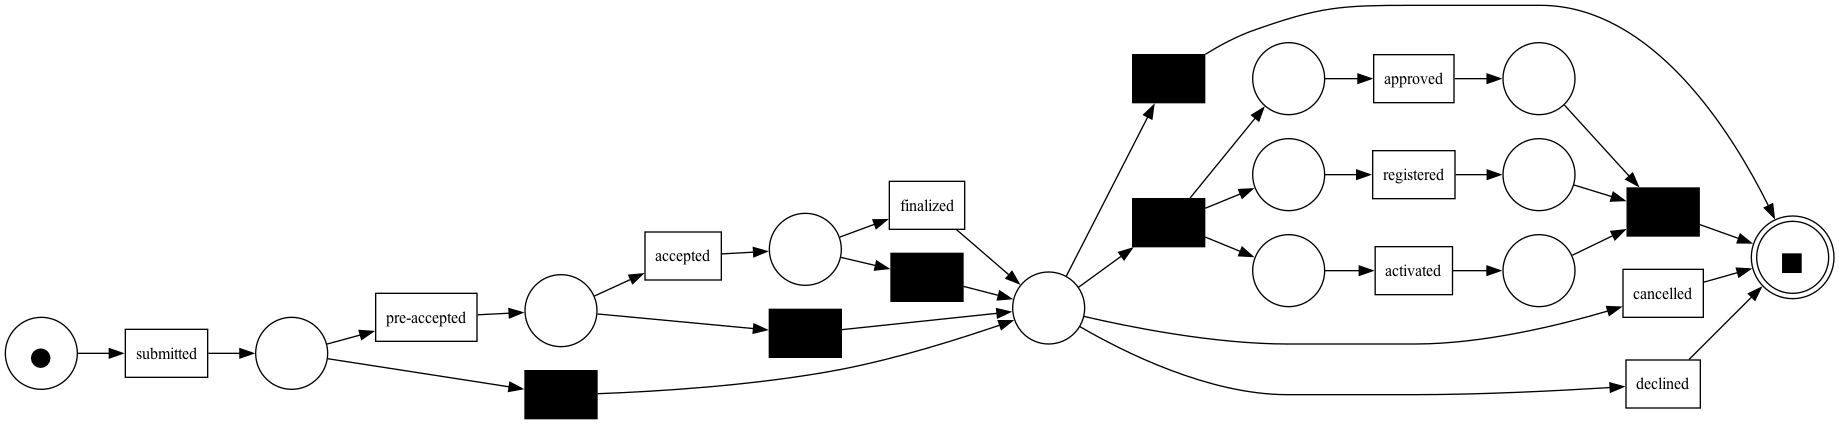

12
15


In [244]:
net, im, fm = pm4py.discover_petri_net_inductive(log, noise_threshold=0)
pm4py.view_petri_net(net, im, fm)
print(len(net.places))
print(len(net.transitions))

1c) Conformance

In [ ]:
diag = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)
diag

In [ ]:
diag = pm4py.conformance_diagnostics_alignments(log, net, im, fm)
diag

In [234]:
tbr = pm4py.fitness_token_based_replay(log, net, im, fm)
tbr

replaying log with TBR, completed traces ::   0%|          | 0/17 [00:00<?, ?it/s]

{'perc_fit_traces': 64.29280965843968,
 'average_trace_fitness': 0.8943851486749919,
 'log_fitness': 0.9081076604101961,
 'percentage_of_fitting_traces': 64.29280965843968}

In [236]:
align = pm4py.fitness_alignments(log, net, im, fm)
align['log_fitness']

aligning log, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

0.8935678233578983

In [228]:
tbr = pm4py.precision_token_based_replay(log, net, im, fm)
tbr

replaying log with TBR, completed traces ::   0%|          | 0/13 [00:00<?, ?it/s]

1.0

In [230]:
align = pm4py.precision_alignments(log, net, im, fm)
align

computing precision with alignments, completed variants ::   0%|          | 0/13 [00:00<?, ?it/s]

1.0

Object-centric PM

In [9]:
ocel = pm4py.read_ocel("logs/example_log.jsonocel")
print(ocel)

Object-Centric Event Log (number of events: 23, number of objects: 15, number of activities: 15, number of object types: 3, events-objects relationships: 39)
Activities occurrences: Counter({'Create Order': 3, 'Create Delivery': 3, 'Delivery Successful': 3, 'Invoice Sent': 2, 'Payment Reminder': 2, 'Confirm Order': 1, 'Item out of Stock': 1, 'Item back in Stock': 1, 'Delivery Failed': 1, 'Retry Delivery': 1, 'Pay Order': 1, 'Remove Item': 1, 'Cancel Order': 1, 'Add Item to Order': 1, 'Send for Credit Collection': 1})
Object types occurrences (number of objects): Counter({'element': 9, 'order': 3, 'delivery': 3})
Unique activities per object type: Counter({'order': 8, 'element': 6, 'delivery': 4})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


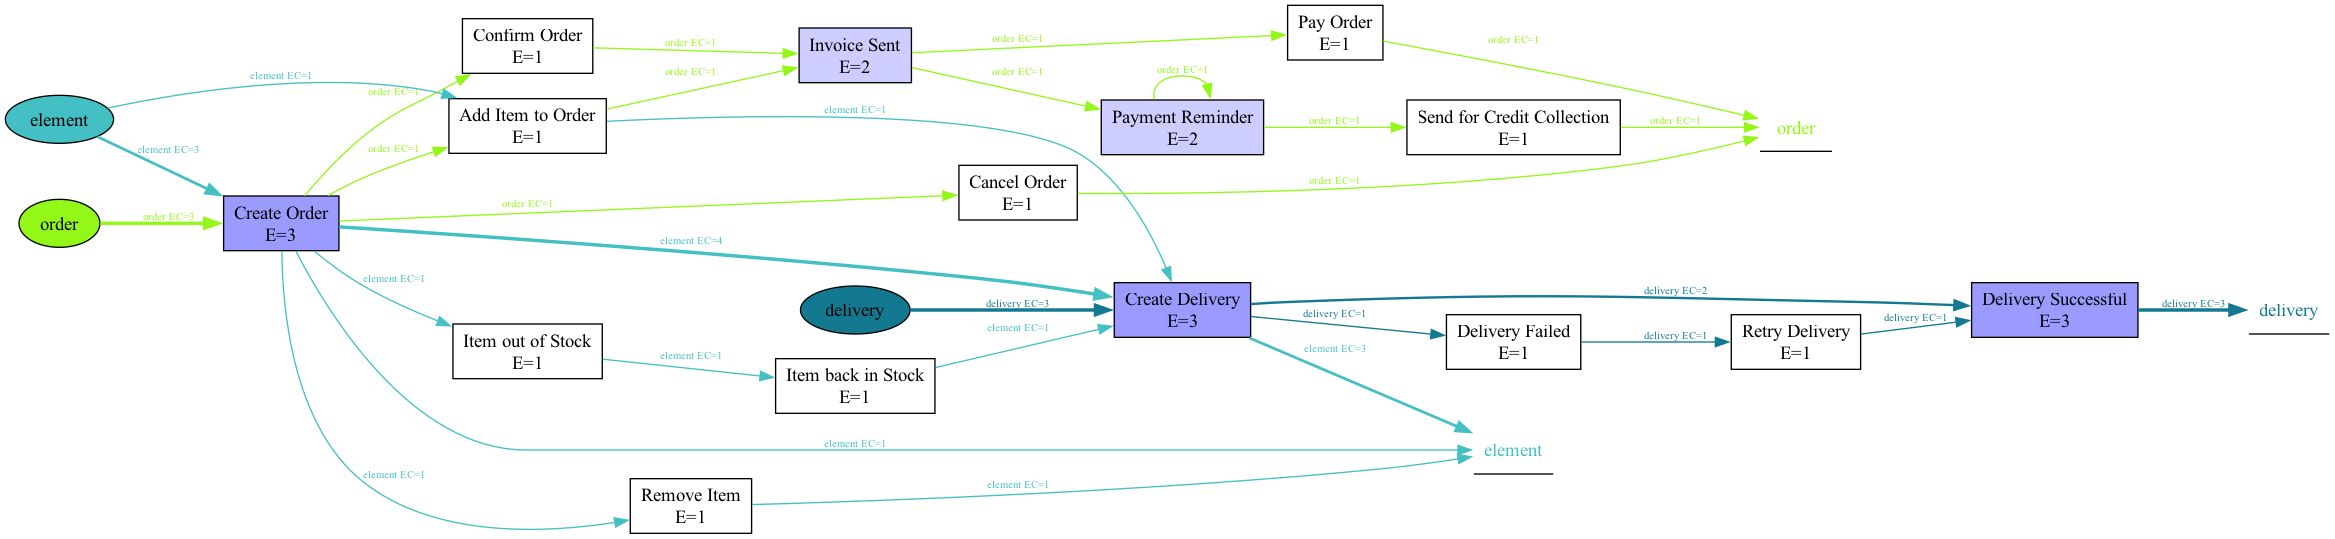

In [11]:
ocel = pm4py.read_ocel("logs/example_log.jsonocel")
model = pm4py.discover_ocdfg(ocel)
pm4py.view_ocdfg(model)

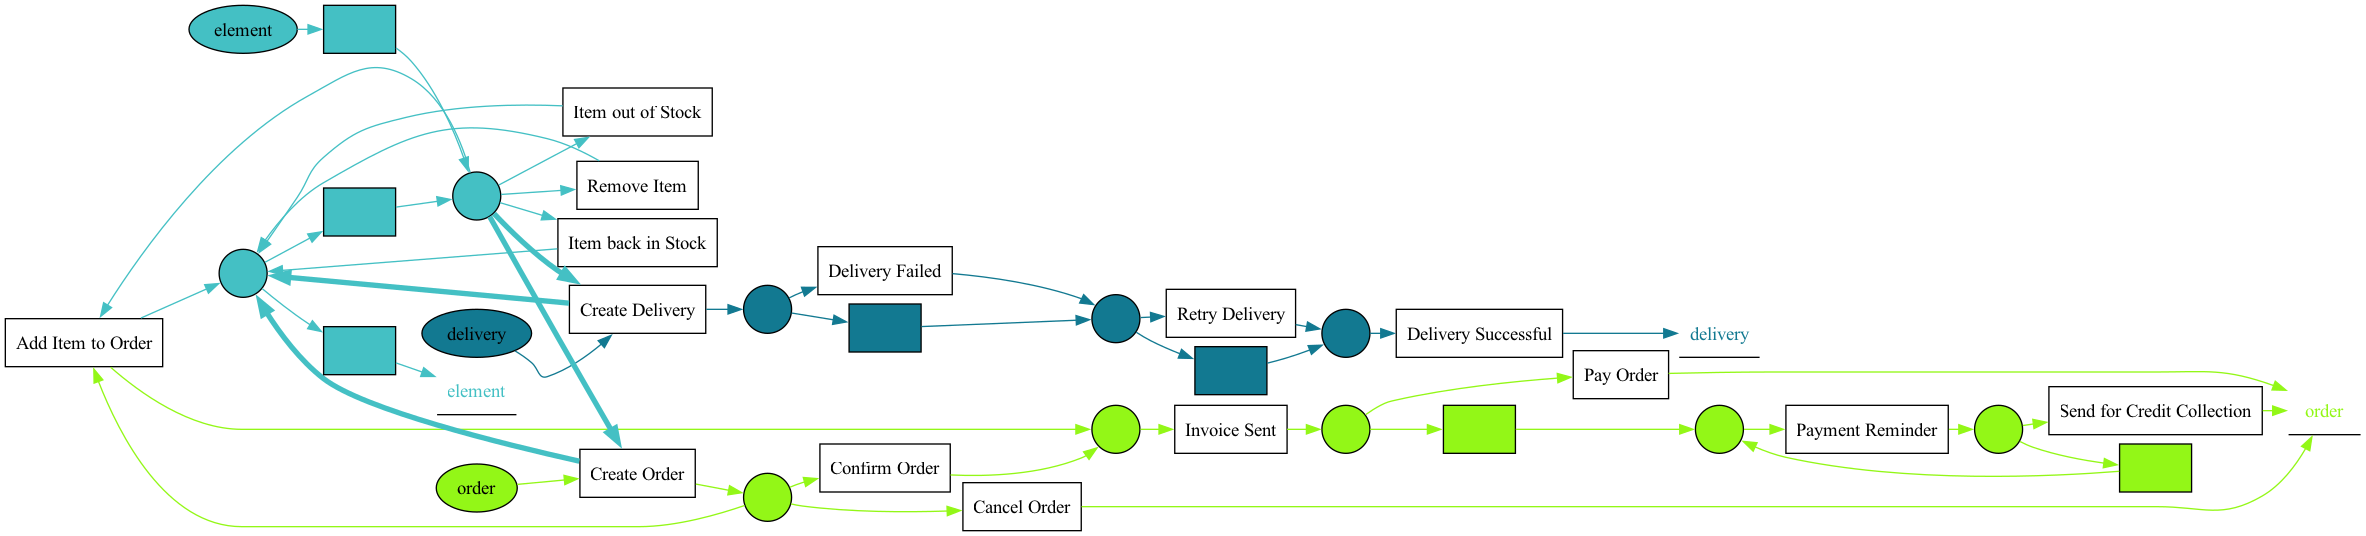

In [13]:
ocel = pm4py.read_ocel("logs/example_log.jsonocel")
model = pm4py.discover_oc_petri_net(ocel)
pm4py.view_ocpn(model)